# **Network Intrusion Detection System Project**

### **Business Objective**:
With the continuous growth of computer network usage and the increasing number of applications, network security has become paramount. Intrusion Detection Systems (IDSs) play a crucial role in detecting anomalies and attacks in the network. This project aims to build a Network Intrusion Detection System using machine learning.

### **Problems**:
1. **Binomial Classification:** Detect anomalies by predicting whether the activity is normal or an attack.
2. **Multinomial Classification:** Detect the type of activity by predicting whether it is Normal, Back, Buffer Overflow, FTP Write, Guess Password, Neptune, N-Map, Port Sweep, Root Kit, Satan, or Smurf.

### **Available Data**:
The organization has captured data over time for different types of attacks and provided it in different files for various activities, including normal. There are 10 tables, each representing a different type of attack.

### **Tables**:
1. Data_of_Attack_Back_Normal
2. Data_of_Attack_Back
3. Data_of_Attack_Back_BufferOverflow
4. Data_of_Attack_Back_FTPWrite
5. Data_of_Attack_Back_GuessPassword
6. Data_of_Attack_Back_Neptune
7. Data_of_Attack_Back_NMap
8. Data_of_Attack_Back_PortSweep
9. Data_of_Attack_Back_RootKit
10. Data_of_Attack_Back_Satan
11. Data_of_Attack_Back_Smurf

#### **Basic Features of Each Network Connection Vector**:
1. Duration
2. Protocol_type
3. Service
4. Flag
5. Src_bytes
6. Dst_bytes
7. Land
8. Wrong_fragment
9. Urgent

#### **Content-Related Features of Each Network Connection Vector**:
10. Hot
11. Num_failed_logins
12. Logged_in
13. Num_compromised
14. Root_shell
15. Su_attempted
16. Num_root
17. Num_file_creations
18. Num_shells
19. Num_access_files
20. Num_outbound_cmds
21. Is_hot_login
22. Is_guest_login

#### **Time-Related Traffic Features of Each Network Connection Vector**:
23. Count
24. Srv_count
25. Serror_rate
26. Srv_serror_rate
27. Rerror_rate
28. Srv_rerror_rate
29. Same_srv_rate
30. Diff_srv_rate
31. Srv_diff_host_rate

#### **Host-Based Traffic Features in a Network Connection Vector**:
32. Dst_host_count
33. Dst_host_srv_count
34. Dst_host_same_srv_rate
35. Dst_host_diff_srv_rate
36. Dst_host_same_src_port_rate
37. Dst_host_srv_diff_host_rate
38. Dst_host_serror_rate
39. Dst_host_srv_serror_rate
40. Dst_host_rerror_rate
41. Dst_host_srv_rerror_rate

#### **Type Features**:
**Nominal:**
- Protocol_type (2)
- Service (3)
- Flag (4)

**Binary:**
- Land (7)
- Logged_in (12)
- Root_shell (14)
- Su_attempted (15)
- Is_hot_login (21)
- Is_guest_login (22)

#### **Import Libraries**

In [1]:
# import packages
import os
import  sys 
import math
import pickle
import joblib
import pandas as pd 
pd.options.display.max_columns = None
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import  confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


#### **Load the data**

In [2]:
# Get the current directory of the script
current_directory = os.getcwd()
# Specify the relative path to the "data" folder
data_directory = os.path.join(current_directory, 'data')

In [3]:
# read csv file with normal network data
df_normal = pd.read_csv('data/Data_of_Attack_Back_Normal.csv')
df_normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [4]:
# save feature names to assign to dataframe. 
column_names = df_normal.columns
print(column_names)

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')


In [5]:
# intial examination we noticed this data has no feature names we will assign feature names. 
df_ftp = pd.read_csv('data/Data_of_Attack_Back_FTPWrite.csv', names=column_names)
df_ftp['attack_type'] = "FTPWrite"
df_ftp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,0,0.1,0.0,0,0,0.0,0.1,0,0.1,0,0,0.1,0.001,0.001,0,0,0,0,0.1,0,0.0,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0,FTPWrite
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,0,0.1,0.1,0,0,0.1,0.0,0,0.1,0,0,0.0,0.001,0.001,0,0,0,0,0.1,0,0.0,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0,FTPWrite
2,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,0,0.1,0.0,0,0,0.1,0.0,0,0.0,0,0,0.0,0.001,0.002,0,0,0,0,0.1,0,0.1,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0,FTPWrite
3,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,0,0.1,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.001,0.001,0,0,0,0,0.1,0,0.0,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0,FTPWrite
4,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,0,0.1,0.0,0,0,0.0,0.1,0,0.1,0,0,0.1,0.001,0.001,0,0,0,0,0.1,0,0.0,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0,FTPWrite


In [6]:
# Step 1: Data Preparation
dfs = []
attack_types = [
    "Back_Normal",
    "Back",
    "Back_BufferOverflow",
    #"Back_FTPWrite",
    "Back_GuessPassword",
    "Back_Neptune",
    "Back_NMap",
    "Back_PortSweep",
    "Back_RootKit",
    "Back_Satan",
    "Back_Smurf"
]

for attack_type in attack_types:
    # Construct the full path to the CSV file within the "data" folder
    file_path = os.path.join(data_directory, f'Data_of_Attack_{attack_type}.csv')
    
    df = pd.read_csv(file_path)
    df['attack_type'] = attack_type.split('_')[-1]
    dfs.append(df)


In [7]:
# append df_ftp
dfs.append(df_ftp)

# concatenate all the dataframes 
network_df = pd.concat(dfs)
network_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,Normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Normal


#### **Data Cleaning and Exploratory Data Analysis**

In [8]:
# create feature  'attack/normal' based on 'attack_type' variable. 
network_df['attack/normal'] = network_df['attack_type'].apply(lambda x: 'normal' if  x=='Normal' else 'attack')

In [9]:
# drop attack type for binary classification 
net_attack_df = network_df.drop('attack_type', axis=1)

In [10]:
# information about the dataset
net_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817551 entries, 0 to 7
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817551 non-null  float64
 1    protocol_type                817551 non-null  float64
 2    service                      817551 non-null  float64
 3    flag                         817551 non-null  float64
 4    src_bytes                    817551 non-null  float64
 5    dst_bytes                    817551 non-null  float64
 6    land                         817551 non-null  int64  
 7    wrong_fragment               817551 non-null  float64
 8    urgent                       817551 non-null  float64
 9    hot                          817551 non-null  float64
 10   num_failed_logins            817551 non-null  float64
 11   logged_in                    817551 non-null  float64
 12   num_compromised              817551 non-null  float64

In [11]:
# clear white-space
net_attack_df.columns = net_attack_df.columns.str.strip()

In [12]:
# check for duplicate values 
len(net_attack_df[net_attack_df.duplicated()])

1

In [13]:
# drop duplicate samples 
net_attack_df.drop_duplicates(inplace=True)

In [14]:
#check for missing values 
net_attack_df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
# drop columns with zero standard deviation 
def cols_with_zero_std(df: pd.DataFrame):
    
    cols_to_drop = []
    # Select numerical columns only
    num_columns = [col for col in df.columns if df[col].dtype != 'O']

    for col in num_columns:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

# features with zero standard deviation 
cols_to_drop_1 = cols_with_zero_std(df=net_attack_df) 
print(cols_to_drop_1)

['land', 'num_outbound_cmds']


These are the features that are not going to contribute to model training 

In [16]:
# drop features with zero std
net_attack_df.drop(cols_to_drop_1, axis=1, inplace=True)

In [17]:
# check the shape of dataset after removing redundanat features 
net_attack_df.shape

(817550, 40)

In [18]:
# list of all features 
features = net_attack_df.drop('attack/normal', axis=1).columns.tolist()

# Nominal Features
nominal_features = ['protocol_type', 'service', 'flag']

# Binary Features
binary_features = ['logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']

In [19]:
# Create a set of all features
all_features = set(features)

# Create sets of nominal and binary features
nominal_set = set(nominal_features)
binary_set = set(binary_features)

# Calculate the numeric features by finding the difference
numeric_features = list(all_features - (nominal_set | binary_set))

##### **Analysing Nominal categorical features** 

In [20]:
for col in nominal_features:
    print(f"Frequency of  {col}:")
    print(net_attack_df[col].value_counts())
    print('==='*30)

Frequency of  protocol_type:
protocol_type
0.00    776566
0.01     35402
0.02      5582
Name: count, dtype: int64
Frequency of  service:
service
0.00    462331
0.12    181678
0.01     53979
0.02     31806
0.14     21976
         ...  
0.38         5
0.64         2
0.65         2
0.67         2
0.63         1
Name: count, Length: 67, dtype: int64
Frequency of  flag:
flag
0.00    570818
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.10       298
0.09       122
0.01        97
0.04        40
0.03        19
Name: count, dtype: int64


In [21]:
# reduce dimenstion by combining minority nominal classes. 
service_thresold = 20000

#count frequency of each category. 
service_category_count = net_attack_df['service'].value_counts()

# identify minority category below threshold
minority_cat =  service_category_count[service_category_count < service_thresold].index

# replace minority category with others 
net_attack_df['service'] = net_attack_df['service'].apply(lambda x: 'others' if x in minority_cat else x)


In [22]:
# reduce dimenstion by combining minority nominal classes. 
service_thresold = 35000

#count frequency of each category. 
flag_category_count = net_attack_df['flag'].value_counts()

# identify minority category below threshold
minority_cat =  flag_category_count[flag_category_count < service_thresold].index

# replace minority category with others 
net_attack_df['flag'] = net_attack_df['flag'].apply(lambda x: 'others' if x in minority_cat else x)


In [23]:
# replace normal - 0 , attack - 1 
net_attack_df['attack_flag'] = net_attack_df['attack/normal'].apply(lambda x : 1 if x == 'attack' else 0)
net_attack_df.drop('attack/normal', axis=1, inplace=True) 
net_attack_df['attack_flag'].value_counts()

attack_flag
0    576710
1    240840
Name: count, dtype: int64

In [24]:
# target class distribution
net_attack_df['attack_flag'].value_counts(normalize=True)

attack_flag
0    0.705413
1    0.294587
Name: proportion, dtype: float64

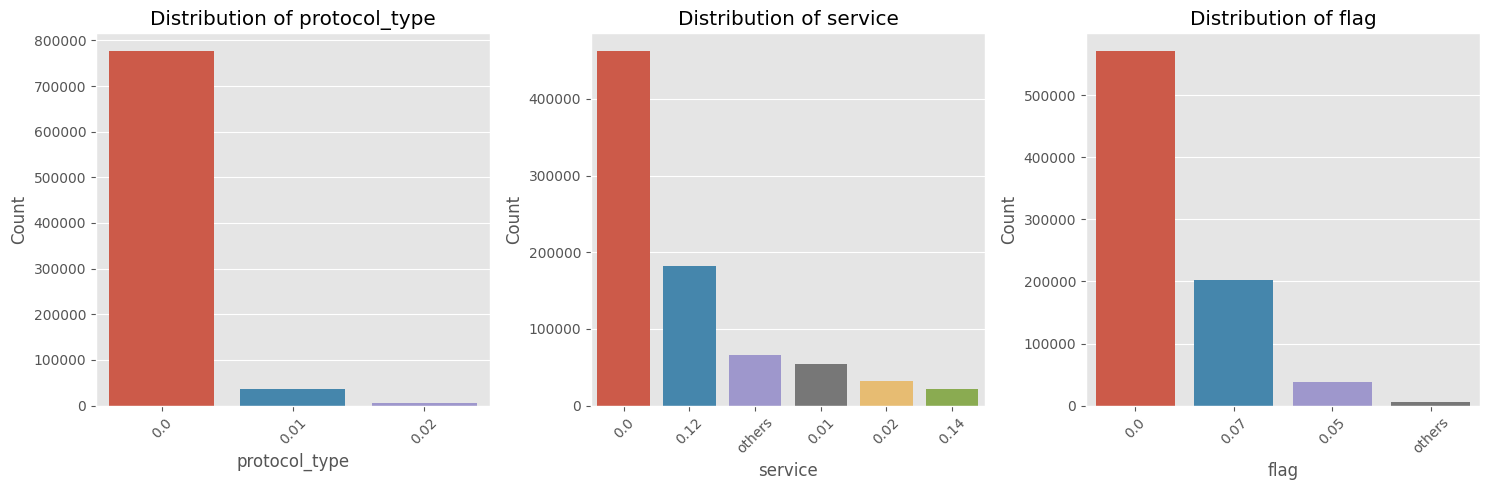

In [25]:
# Data distribution for each nominal feature
plt.figure(figsize=(15, 5))

for i, feature in enumerate(nominal_features, 1):
    plt.subplot(1, len(nominal_features), i)
    sns.countplot(data=net_attack_df, x=feature, order=net_attack_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **Analysing Binary features**

In [26]:
for col in binary_features:
    print(f"Frequency of  {col}:")
    print(net_attack_df[col].value_counts())
    print('==='*30)

Frequency of  logged_in:
logged_in
0.1    521695
0.0    295855
Name: count, dtype: int64
Frequency of  root_shell:
root_shell
0.0    817299
0.1       251
Name: count, dtype: int64
Frequency of  su_attempted:
su_attempted
0.0    817495
0.2        36
0.1        19
Name: count, dtype: int64
Frequency of  is_host_login:
is_host_login
0.0    817549
0.1         1
Name: count, dtype: int64
Frequency of  is_guest_login:
is_guest_login
0.0    815285
0.1      2265
Name: count, dtype: int64


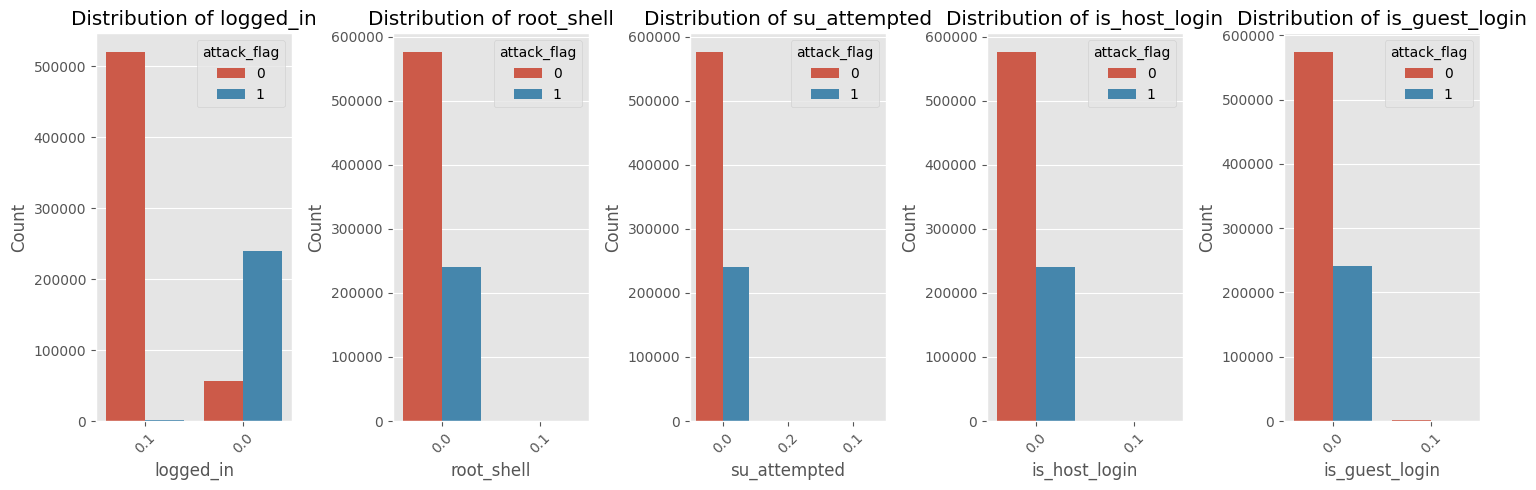

In [27]:
# Data distribution for each binary feature
plt.figure(figsize=(15, 5))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(1, len(binary_features), i)
    sns.countplot(data=net_attack_df, x=feature,hue='attack_flag', order=net_attack_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
# drop highly imbalanced binary features they don't contribute to model 
net_attack_df.drop(['root_shell', 'su_attempted', 'is_host_login'], axis=1, inplace=True)

In [29]:
# update binary features list
binary_features = [x for x in binary_features if x not in ['root_shell', 'su_attempted', 'is_host_login']]
print(binary_features)

['logged_in', 'is_guest_login']


##### **Exploring Frequency Distribution of Nominal Features for each 'attack_flag'**

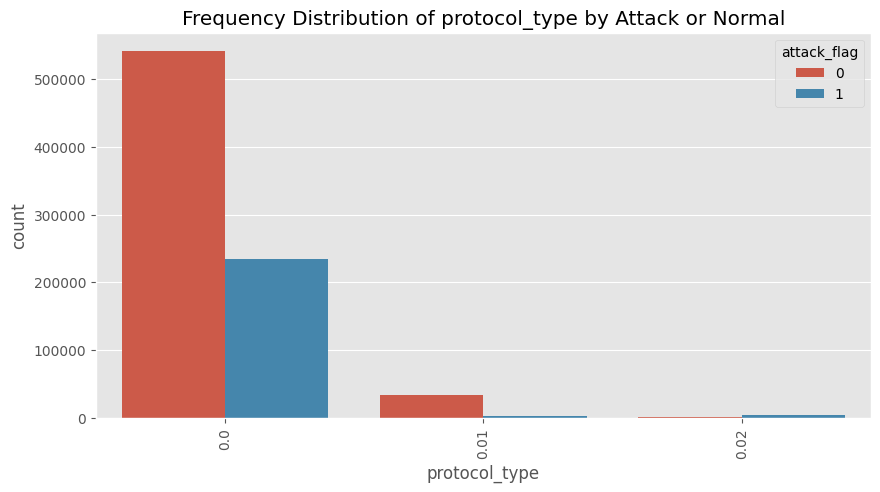

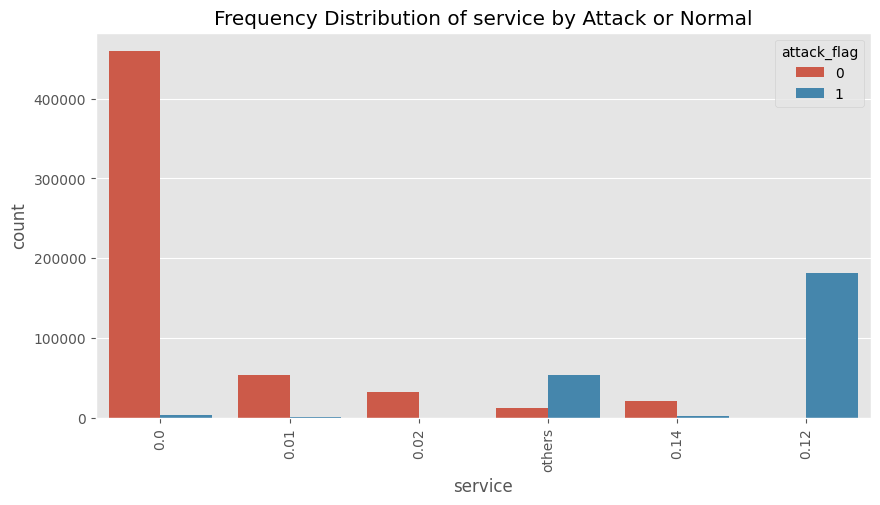

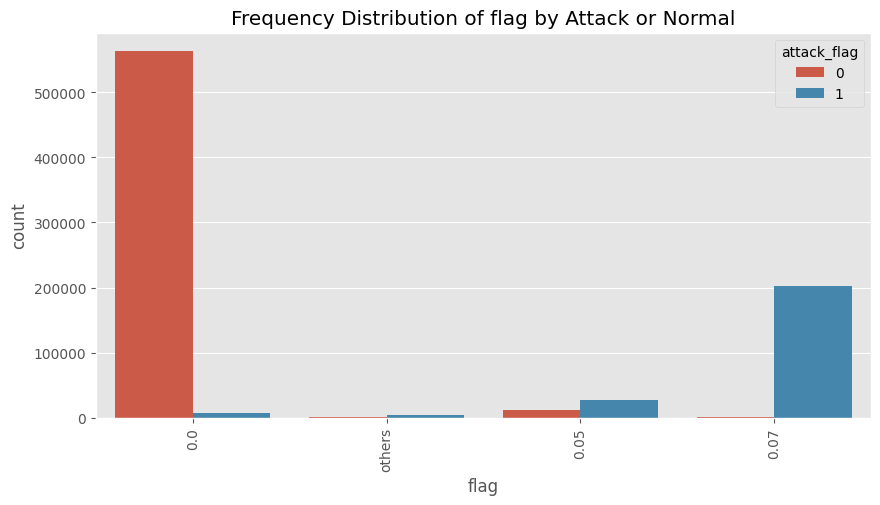

In [30]:
# Plot frequency distribution of nominal features
for feature in nominal_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=net_attack_df, x=feature, hue='attack_flag')
    plt.title(f'Frequency Distribution of {feature} by Attack or Normal')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
# descriptiive statistics
net_attack_df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
rerror_rate,817550.0,5.355293e-03,0.022330,0.0,0.000,0.00000,0.00000,0.100
dst_host_count,817550.0,1.668684e-01,0.102058,0.0,0.054,0.25500,0.25500,0.255
serror_rate,817550.0,2.483347e-02,0.043074,0.0,0.000,0.00000,0.01500,0.100
srv_count,817550.0,1.407805e-02,0.031403,0.0,0.003,0.00800,0.01600,0.511
num_root,817550.0,1.462541e-03,0.031777,0.0,0.000,0.00000,0.00000,1.000
srv_rerror_rate,817550.0,5.313484e-03,0.022215,0.0,0.000,0.00000,0.00000,0.100
dst_bytes,817550.0,2.486213e-02,0.066635,0.0,0.000,0.00367,0.01969,1.000
dst_host_srv_rerror_rate,817550.0,5.278927e-03,0.022070,0.0,0.000,0.00000,0.00000,0.100
wrong_fragment,817550.0,3.669500e-07,0.000332,0.0,0.000,0.00000,0.00000,0.300
dst_host_srv_count,817550.0,1.616515e-01,0.111642,0.0,0.017,0.25500,0.25500,0.255


In [32]:
# one-hot encoding of nominal categorical features 
net_attack_df = pd.get_dummies(net_attack_df, columns=nominal_features, drop_first=True)

##### **Visualizing Correlation Matrix**

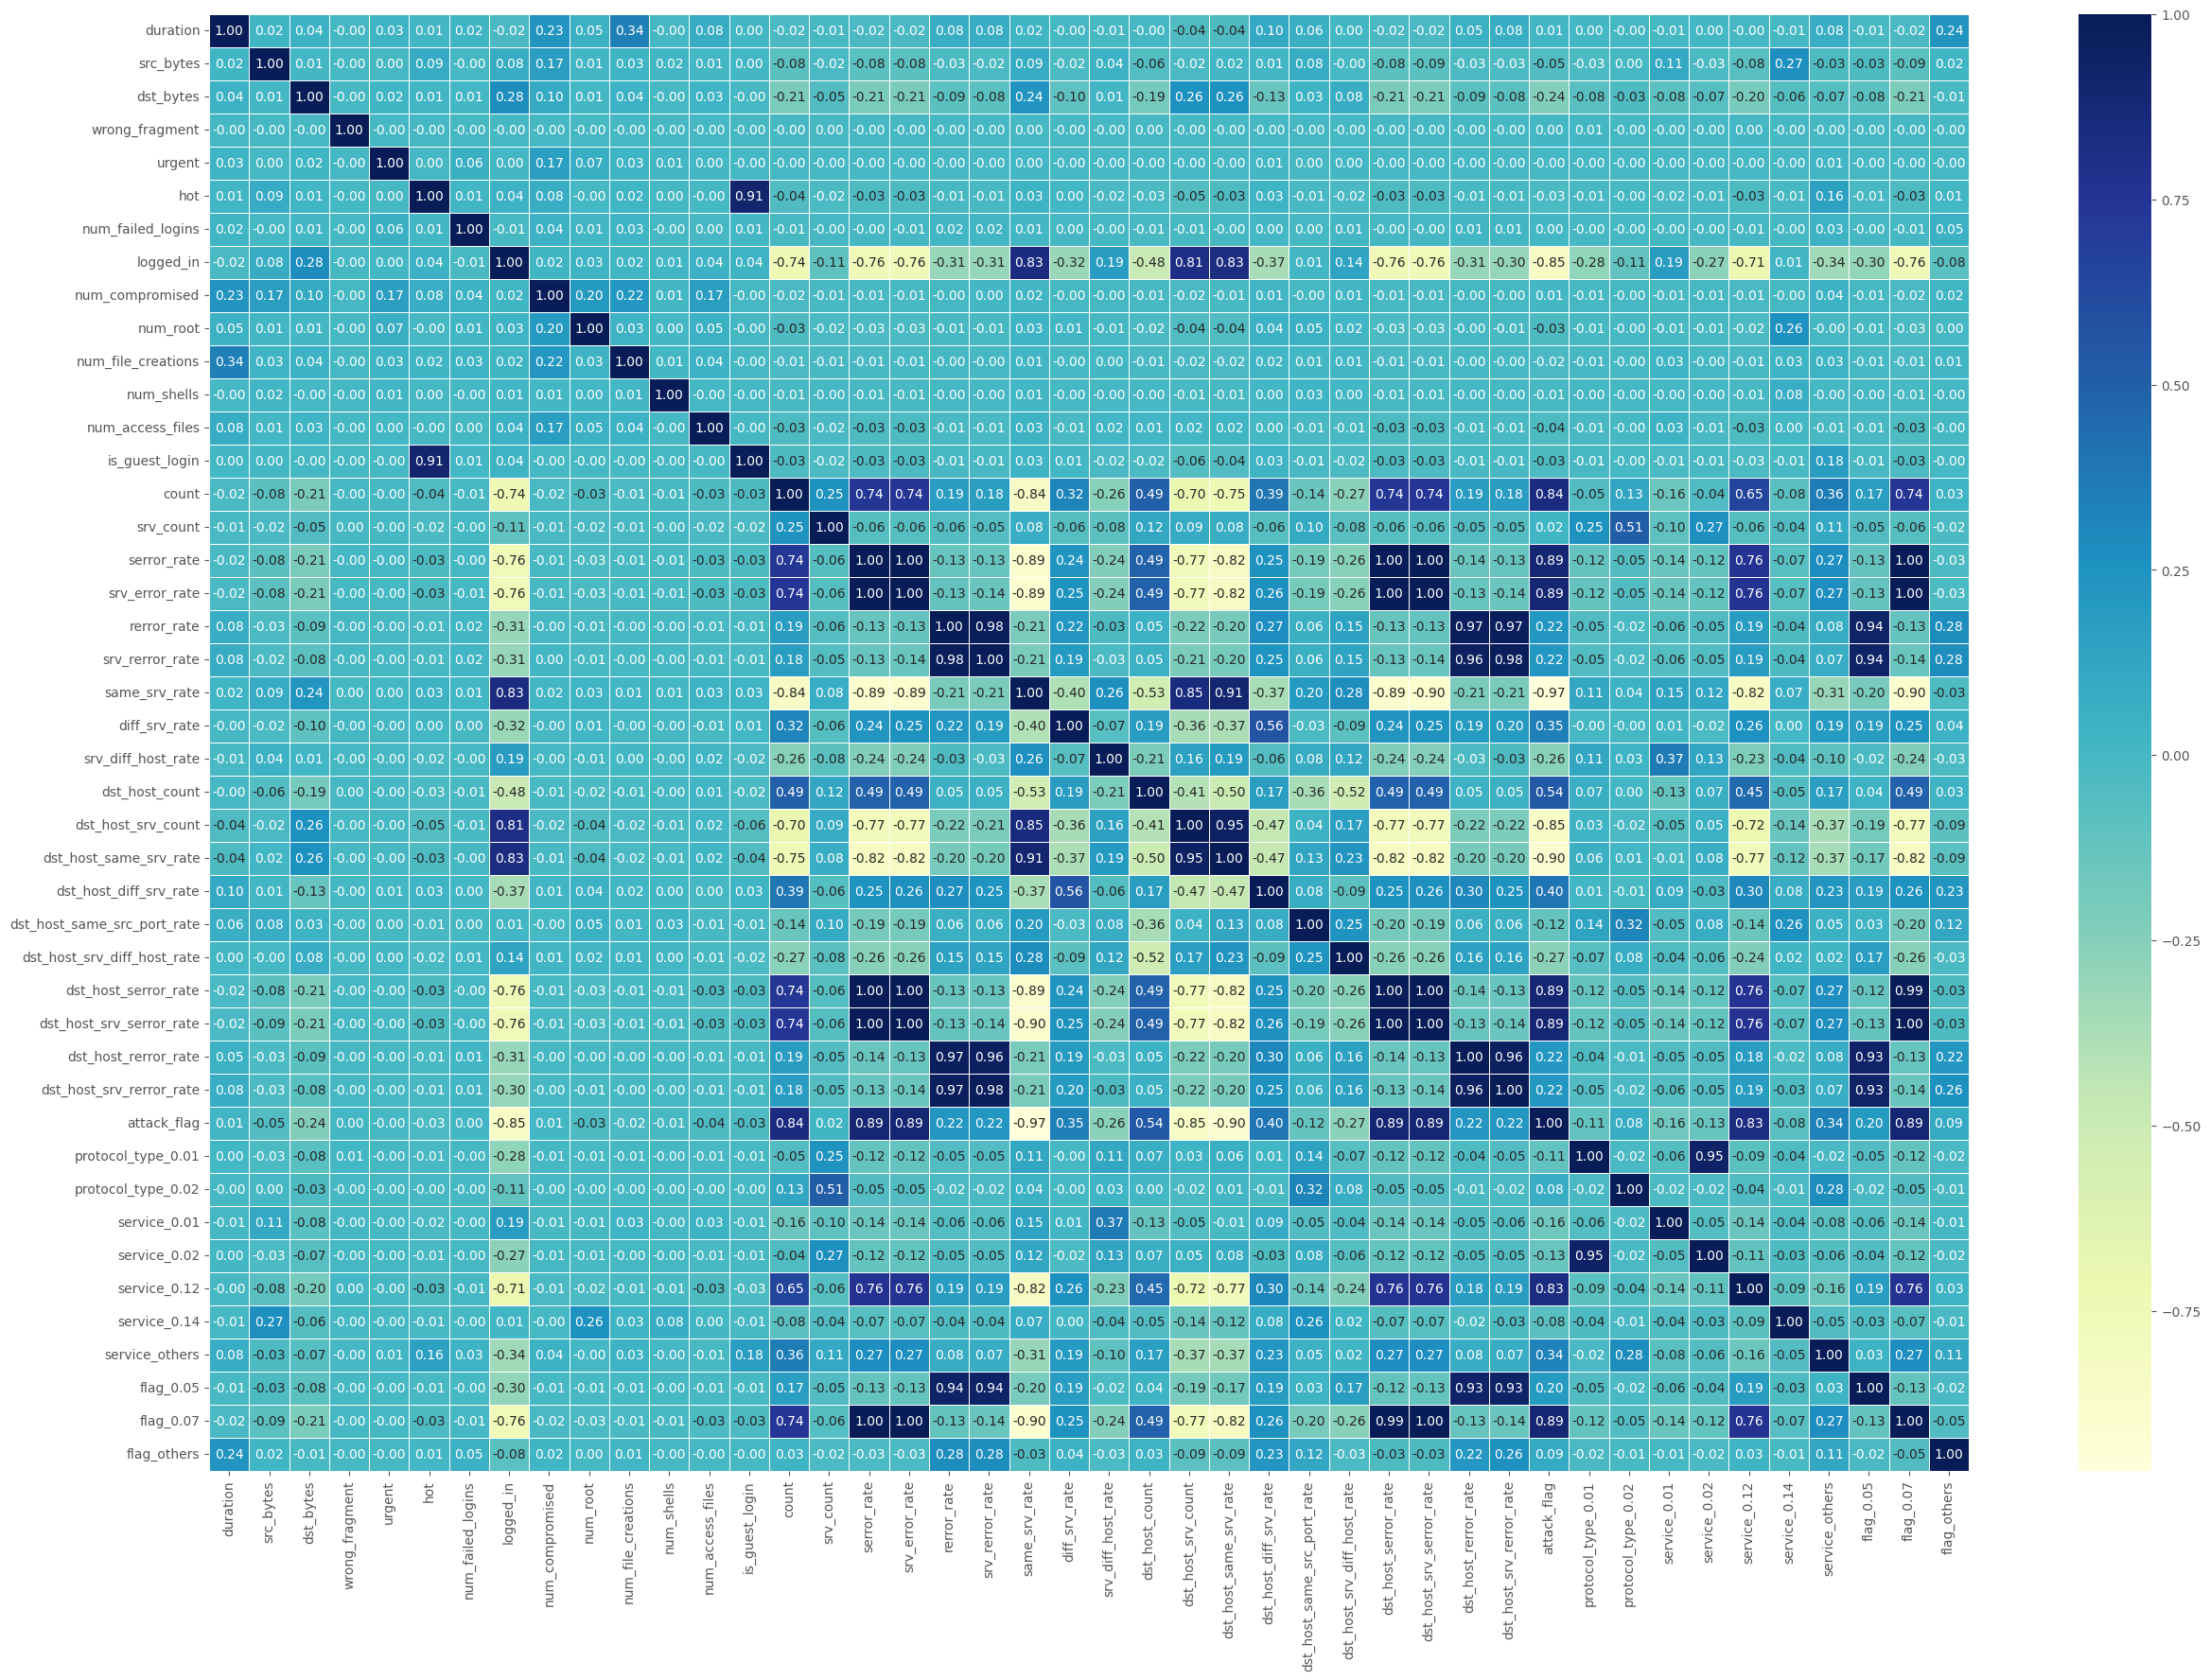

In [33]:
# calculate correlation matrix
corr_matrix = net_attack_df.corr()
# plot correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu');


______________

#### **Train Test Split**

In [34]:
# seperate target and features 
X = net_attack_df.drop('attack_flag', axis=1)
Y = net_attack_df['attack_flag']

In [35]:
# train test split with 30% test data and  stratified target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43, stratify=Y)

In [36]:
# check shape of train and test dataset
X_train.shape , X_test.shape

((572285, 43), (245265, 43))

Dealing with highly correlated features 

In [37]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
# list all highly correlated features to drop
corr_features = correlation(X_train, 0.9)
print(corr_features)

{'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'flag_0.07', 'dst_host_same_srv_rate', 'flag_0.05', 'srv_error_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'service_0.02', 'srv_rerror_rate', 'is_guest_login'}


In [39]:
# keep copy of original 
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

In [40]:
# drop correlated features 
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [41]:
# check shape of train and test dataset after dropping highly correlated features 
X_train.shape, X_test.shape

((572285, 32), (245265, 32))

In [42]:
feature_set = set(X_train.columns)
numeric_set = set(numeric_features)

In [43]:
# intersection 
numeric_features = list(feature_set.intersection(numeric_set))
print(numeric_features)

['rerror_rate', 'dst_host_count', 'serror_rate', 'srv_count', 'num_root', 'dst_bytes', 'wrong_fragment', 'dst_host_srv_count', 'duration', 'src_bytes', 'num_shells', 'num_file_creations', 'urgent', 'srv_diff_host_rate', 'num_compromised', 'hot', 'count', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'num_access_files', 'dst_host_srv_diff_host_rate', 'num_failed_logins', 'same_srv_rate']


#### **Feature Scaling**

Numerical features are scaled using the RobustScaler. The process involves isolating only the numerical features from the original datasets (`X_train` and `X_test`). The RobustScaler is then applied to standardize these numerical features, and the scaled features are integrated back into the corresponding datasets. This ensures that only the numerical features are scaled, leaving categorical features unchanged. RobustScaler is chosen for its ability to handle outliers robustly.


In [44]:
# list encoded nominal features 
import re
service_columns = [col for col in X_train.columns if re.search('service', col)]
flag_columns = [col for col in X_train.columns if re.search('flag', col)]
protocol_columns = [col for col in X_train.columns if re.search('protocol', col)]

nominal_features = service_columns + flag_columns + protocol_columns
print(nominal_features)

['service_0.01', 'service_0.12', 'service_0.14', 'service_others', 'flag_others', 'protocol_type_0.01', 'protocol_type_0.02']


In [45]:
# extract all the feature names
all_features = X_train.columns
# Create a list of numeric features by excluding nominal and binary features
numeric_features = [feature for feature in all_features if feature not in (binary_features + nominal_features)]
# Display the list of numeric features
print("Numeric Features:", numeric_features)

Numeric Features: ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']


In [46]:
# scale numerical features 
scaler = RobustScaler()

# isolate only numerical features to scale
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

# scale numerical features 
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# create a copy of train and test features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# only numerical features are scaled in the train and test feature set
X_train_scaled[numeric_features] = X_train_num_scaled
X_test_scaled[numeric_features] = X_test_num_scaled

#### **Feature selection**

##### **Feature selection by Information gain**

In this section, the mutual information between features and the target variable is calculated using the `mutual_info_classif`function. The sum of mutual information is then computed, and a list of tuples containing feature importance and feature names is created. Feature selection is performed based on cumulative importance, where features are selected until their cumulative importance reaches or exceeds 90%. The selected features are printed for further consideration in the modeling process.

In [47]:
# Calculate the mutual information between the features and the target variable
mi = mutual_info_classif(X_train_scaled, y_train)

In [48]:
# Calculate the sum of mutual information
mi_sum = sum(mi)
features = X_train.columns
# Sort and create a list of tuples containing feature importance and feature names
feature_list = sorted(zip(mi, features), reverse=True)

# Perform feature selection based on cumulative importance
cumulative_sum = 0
selected_features = []
for importance, feature in feature_list:
    cumulative_sum += importance / mi_sum
    selected_features.append(feature)
    if cumulative_sum >= 0.9:
        break

# Print selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
same_srv_rate
diff_srv_rate
src_bytes
logged_in
dst_host_srv_count
count
dst_bytes
dst_host_diff_srv_rate
serror_rate
service_0.12
dst_host_count
dst_host_srv_diff_host_rate


In [49]:
# feature set with selected features 
X_train_fs = X_train_scaled[selected_features]
X_test_fs  = X_test_scaled[selected_features]

### **Model Selection**

This code block initializes and evaluates the performance of various machine learning models for a binary classification task. Models such as Logistic Regression, K-Nearest Neighbors, Gaussian Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, XGBoost, and CatBoost are trained on the training set (`X_train_fs`, `y_train`) and evaluated on the testing set (`X_test_fs`, `y_test`). The evaluation metrics include Accuracy, Precision, Recall, F1 Score, and ROC-AUC Score. Confusion matrices are also generated for each model, providing a visual representation of classification results. The goal is to identify the most suitable model for the given classification problem based on these performance metrics.

Model: Logistic Regression
Accuracy: 0.9938
Precision: 0.9957
Recall: 0.9834
F1 Score: 0.9895
ROC-AUC Score: 0.9908


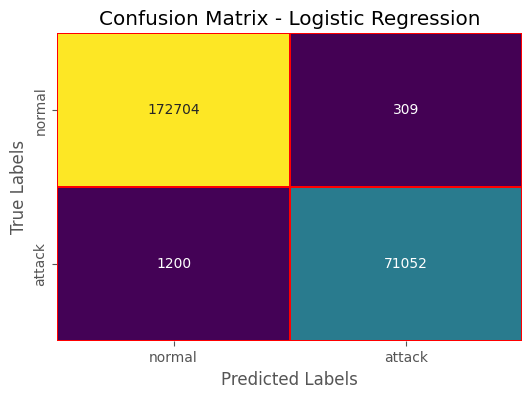

Model: K-Nearest Neighbors
Accuracy: 0.9995
Precision: 0.9995
Recall: 0.9987
F1 Score: 0.9991
ROC-AUC Score: 0.9992


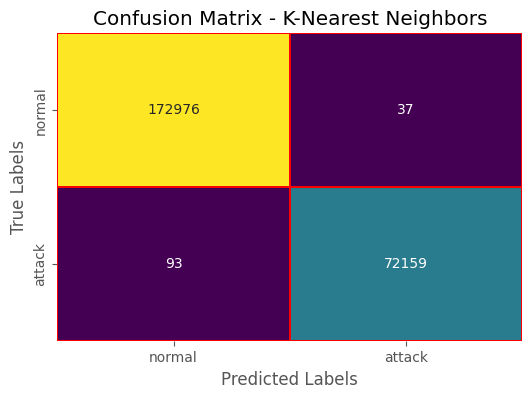

Model: Gaussian Naive Bayes
Accuracy: 0.9918
Precision: 0.9851
Recall: 0.9870
F1 Score: 0.9860
ROC-AUC Score: 0.9904


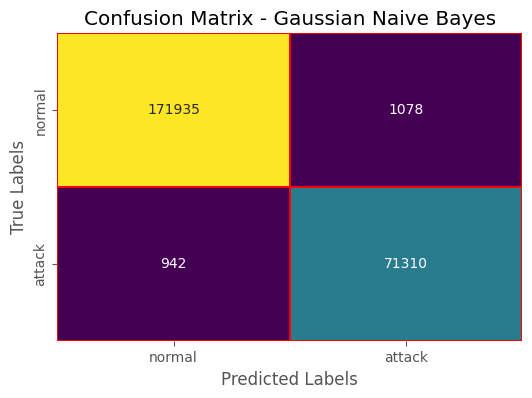

Model: Decision Tree
Accuracy: 0.9998
Precision: 0.9996
Recall: 0.9996
F1 Score: 0.9996
ROC-AUC Score: 0.9997


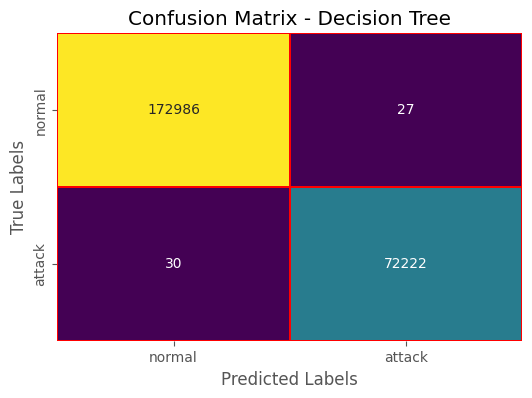

Model: Random Forest
Accuracy: 0.9998
Precision: 0.9999
Recall: 0.9995
F1 Score: 0.9997
ROC-AUC Score: 0.9997


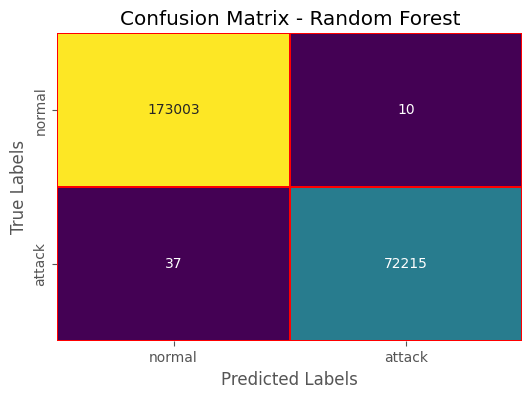

Model: XGBoost
Accuracy: 0.9998
Precision: 0.9998
Recall: 0.9996
F1 Score: 0.9997
ROC-AUC Score: 0.9998


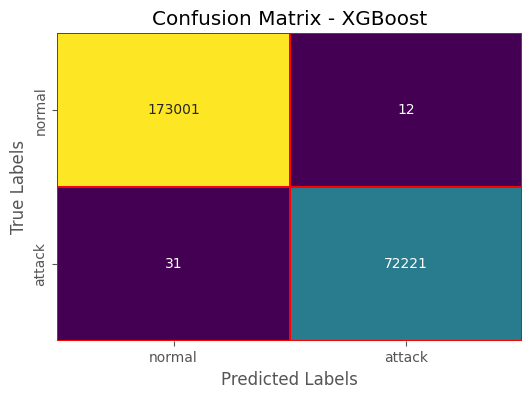

Model: CatBoost
Accuracy: 0.9996
Precision: 0.9998
Recall: 0.9989
F1 Score: 0.9993
ROC-AUC Score: 0.9994


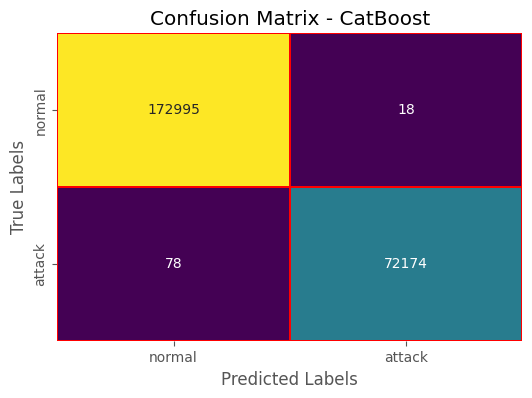

In [50]:
# Initialize different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_fs, y_train)
    y_pred = model.predict(X_test_fs)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print the evaluation metrics for each model
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", 
                cmap="viridis", cbar=False,
                linewidths=0.3, linecolor='red',
                xticklabels=['normal', 'attack'],
                yticklabels=['normal', 'attack'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("===" * 30)

Here's how to interpret confusion matrices for the above classification models:

 - Top-left (TP): Number of instances correctly predicted as `attack`
 - Bottom-right (TN): Number of instances correctly predicted as `normal`
 - Top-right (FP): Number of instances predicted as `attack` but actually `normal` (false alarms).
 - Bottom-left (FN): Number of instances predicted as `normal` but actually `attack` (missed detections).

Upon meticulous evaluation of the performance metrics across various machine learning models, the XGBoost model emerges as a standout performer. Its superior performance is evident through consistently high scores in key metrics, including Accuracy, Precision, Recall, F1 Score, and ROC-AUC. Notably, the confusion matrix for XGBoost reveals a commendable reduction in False Negatives(missed detactions) compared to other models.

In light of these findings, we confidently recommend the adoption of the XGBoost model for further stages of the classification task. Its robust predictive capabilities and ability to minimize misclassifications make it an optimal choice for achieving accurate and reliable predictions on the given dataset.

### **Model Training**

Building upon the model selection phase, the XGBoost algorithm has been identified as the optimal choice for our binary classification task. Leveraging its superior performance from the evaluation stage, we proceed to train the XGBoost model on the designated training set. The model is equipped to learn intricate patterns within the data, leveraging its ensemble learning capabilities for enhanced predictive accuracy. The training process involves fine-tuning the model's parameters to achieve optimal performance and generalization.

Once the training is complete, the XGBoost model is poised to deliver high-quality predictions, making it well-suited for deployment in real-world scenarios. Continuous monitoring and potential refinement of the model may be carried out to ensure sustained effectiveness in handling unseen data.

Model: XGBoost Classifier
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1 Score: 0.9999
ROC-AUC Score: 0.9999


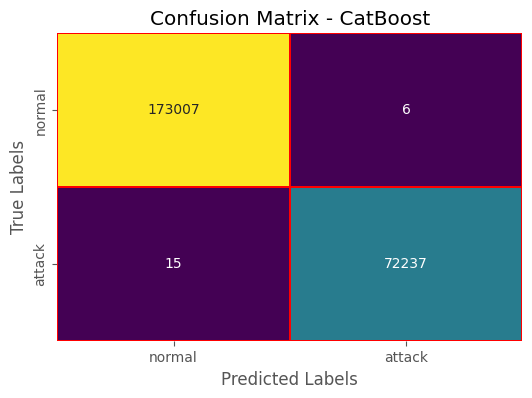

In [51]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()
# fit the model using train data
xgb_clf.fit(X_train, y_train)
# predict using test data 
y_pred = xgb_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for each model
print(f"Model: XGBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", 
            cmap="viridis", cbar=False,
            linewidths=0.3, linecolor='red',
            xticklabels=['normal', 'attack'],
            yticklabels=['normal', 'attack'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - {model_name}')
plt.show()

#### **Cross-Validation for XGBoost Classifier**

Perform k-fold cross-validation to assess the performance of an XGBoost classifier. The model is initialized and evaluated using a 5-fold cross-validation strategy, where the training data is divided into five subsets. In each iteration, the model is trained on four of these subsets and validated on the remaining one. The evaluation metric chosen for scoring is 'recall,' which measures the model's ability to correctly identify positive instances.

The output includes recall scores for each fold, providing insights into the consistency of the model's performance across different training-validation splits. Additionally, the mean accuracy and standard deviation of the recall scores are calculated, offering a summary of the overall model performance and its variation during cross-validation.

In [52]:
# Initialize the XGBoost classifier
model = XGBClassifier()
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_fs, y_train, cv=5, scoring='recall')
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.99967376 0.99943649 0.99961445 0.99970342 0.99961445]
Mean Accuracy: 0.9996
Standard Deviation: 0.0001


### **Hyper Parameter Tuning for XGBoost Classifier**

Best Parameters: {'learning_rate': 0.3, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 3}
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1 Score: 0.9999
ROC-AUC Score: 0.9999


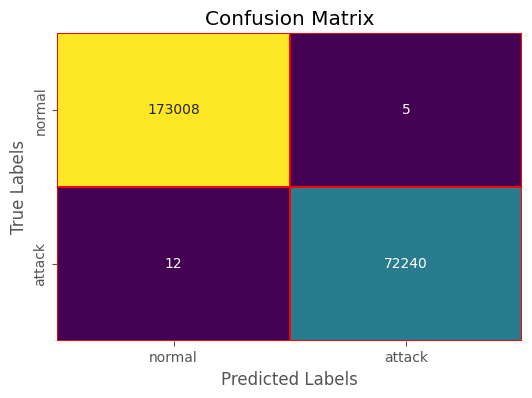

In [53]:
# Create a parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]
}


# Initialize the XGBoost classifier
xgb_clf = XGBClassifier()
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) # 'recall' to minimise FN(false negative)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Get the best parameters and best score
best_params = grid_search.best_params_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the best parameters and best score
print("Best Parameters:", best_params)    

# Print the evaluation for model
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", 
            cmap="viridis", cbar=False,
            linewidths=0.3, linecolor='red',
            xticklabels=['normal', 'attack'],
            yticklabels=['normal', 'attack'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### save the trained  model 

In [54]:
model_filename = 'tuned_xgb_classification_binary.pkl'
joblib.dump(best_model, model_filename)

['tuned_xgb_classification_binary.pkl']